In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from utils.config import cfg
cfg.DATA.DATASET = 'kidney'
cfg.DATA.PATH = 'datasets/'

In [3]:
from dataset_loader import load_data

In [4]:
data, dict_col = load_data(cfg)


Dataset kidney info:
Nb. col: 26
Nb unique t: 7299
Min t: 0.0
Max t: 21.356164383561644


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

In [6]:
kf = KFold(n_splits=5)

index_train = []
index_valid = []
index_test = []
for train, test in kf.split(data):
    index_train.append(train[:int(len(data)*0.6)])
    index_valid.append(train[int(len(data)*0.6):])
    index_test.append(test)

In [7]:
for split in range(5):
    train = data[index_train[split]]
    val = data[index_valid[split]]
    test = data[index_test[split]]
    
    # Normalise the data
    col_name = ["time", "event"] + dict_col['col']
    df_train = pd.DataFrame(data=train, columns=col_name)
    df_val = pd.DataFrame(data=val, columns=col_name)
    df_test = pd.DataFrame(data=test, columns=col_name)
    scaler = MinMaxScaler()
    df_train[dict_col['continuous_keys']] = scaler.fit_transform(df_train[dict_col['continuous_keys']])
    df_val[dict_col['continuous_keys']] = scaler.transform(df_val[dict_col['continuous_keys']])
    df_test[dict_col['continuous_keys']] = scaler.transform(df_test[dict_col['continuous_keys']])

    train = df_train.to_numpy()
    val = df_val.to_numpy()
    test = df_test.to_numpy()
    break

In [8]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()

In [9]:
# df_train['ETHCAT_1'] = df_train['ETHCAT_1'].astype(np.int64)

In [10]:
df_train.columns[17]

'CKD_CAUSE_Other'

In [11]:
df_train[df_train.columns[:18]][:100].shape

(100, 18)

In [12]:
df_train.columns[:18]

Index(['time', 'event', 'TIME_ON_DIALYSIS', 'TIME_ON_DIALYSIS_nan', 'PRA_REC',
       'PRA_REC_nan', 'AGE', 'AGE_DON', 'BUN_DON', 'CREAT_DON', 'HGT_CM_CALC',
       'HGT_CM_DON_CALC', 'WGT_KG_CALC', 'WGT_KG_DON_CALC',
       'CKD_CAUSE_Familial', 'CKD_CAUSE_GN', 'CKD_CAUSE_Hypertension-Vascular',
       'CKD_CAUSE_Other'],
      dtype='object')

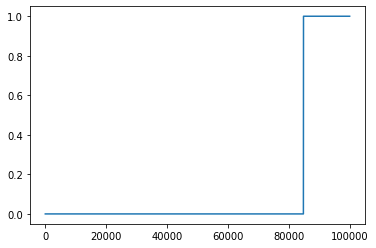

In [14]:
plt.plot(sorted(df_train['CKD_CAUSE_Other'].values))

In [37]:
df_train.mean(axis=0)

time                               6.311929
event                              0.345727
TIME_ON_DIALYSIS                   0.292066
TIME_ON_DIALYSIS_nan               0.018686
PRA_REC                            0.144289
PRA_REC_nan                        0.010345
AGE                                0.455398
AGE_DON                            0.422807
BUN_DON                            0.071415
CREAT_DON                          0.043167
HGT_CM_CALC                        0.536483
HGT_CM_DON_CALC                    0.673850
WGT_KG_CALC                        0.319371
WGT_KG_DON_CALC                    0.377020
CKD_CAUSE_Familial                 0.095615
CKD_CAUSE_GN                       0.156411
CKD_CAUSE_Hypertension-Vascular    0.290209
CKD_CAUSE_Other                    0.151994
ETHCAT_1                           0.411250
ETHCAT_2                           0.342233
ETHCAT_4                           0.160096
DRMIS_1                            0.449564
DRMIS_2                         

In [38]:
df_train['CKD_CAUSE_Other'] += 1

In [ ]:
cph.fit(df_train[df_train.columns[:18]], duration_col='time', event_col='event')

In [8]:
# from sksurv.datasets import load_whas500
# X, y = load_whas500()

In [33]:
from lifelines.datasets import load_rossi

rossi = load_rossi()

In [ ]:
cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')

In [ ]:
import matplotlib.pyplot as plt
from utils.config import cfg
from dataset_loader import load_data
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from lifelines import CoxPHFitter

cfg.DATA.DATASET = 'kidney'
cfg.DATA.PATH = 'datasets/'
data, dict_col = load_data(cfg)

kf = KFold(n_splits=5)

index_train = []
index_valid = []
index_test = []
for train, test in kf.split(data):
    index_train.append(train[:int(len(data)*0.6)])
    index_valid.append(train[int(len(data)*0.6):])
    index_test.append(test)
    
for split in range(5):
    train = data[index_train[split]]
    val = data[index_valid[split]]
    test = data[index_test[split]]
    
    # Normalise the data
    col_name = ["time", "event"] + dict_col['col']
    df_train = pd.DataFrame(data=train, columns=col_name)
    df_val = pd.DataFrame(data=val, columns=col_name)
    df_test = pd.DataFrame(data=test, columns=col_name)
#     scaler = MinMaxScaler()
#     df_train[dict_col['continuous_keys']] = scaler.fit_transform(df_train[dict_col['continuous_keys']])
#     df_val[dict_col['continuous_keys']] = scaler.transform(df_val[dict_col['continuous_keys']])
#     df_test[dict_col['continuous_keys']] = scaler.transform(df_test[dict_col['continuous_keys']])

    train = df_train.to_numpy()
    val = df_val.to_numpy()
    test = df_test.to_numpy()
    break
    
cph = CoxPHFitter()
cph.fit(df_train, duration_col='time', event_col='event')


Dataset kidney info:
Nb. col: 26
Nb unique t: 7299
Min t: 0.0
Max t: 21.356164383561644


In [1]:
from lifelines.datasets import load_rossi

rossi = load_rossi()

In [2]:
rossi.values.dtype

dtype('int64')

In [12]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi
import numpy as np

rossi = load_rossi()
for c in rossi.columns:
    rossi[c] = rossi[c].astype(np.float32)

cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>

In [13]:
cph.print_summary()

/local_workspace/piepmike/ml/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2022-03-06 01:08:31 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

              z      p   -log2(p)
covariate                        
fin       -1.98   0.05       4.40
age       -2.61   0.01       6.79
race       1.02   0.31       1.70
wexp      -0.71   0.48       1.06
mar       -1.14   0.26       1.97
paro      -0.43   0.66       0.59
prio       3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37